# Exemplar: Run simple linear regression

# Introduction

As you're learning, simple linear regression is a way to model the relationship between two variables. By assessing the direction and magnitude of a relationship, data professionals are able to uncover patterns and transform large amounts of data into valuable knowledge. This enables them to make better predictions and decisions. 

In this lab, you are part of an analytics team that provides insights about your company's sales and marketing practices. You have been assigned to a project that focuses on the use of influencer marketing. For this task, you will explore the relationship between your radio promotion budget and your sales. 

The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

# Step 1: Imports

## In this section, first import relevant Python libraries and modules.

In [1]:
# Import relevant Python libraries and modules


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

## Now load the dataset into a DataFrame. 

The dataset provided is a csv file (named `marketing_sales_data.csv`) containing information about promotional marketing conducted in collaboration with influencers, along with the corresponding sales. This is a fictional dataset that was created for educational purposes and modified for this lab. Assume that the numerical variables in the data are expressed in millions of dollars.

In [3]:
# Load the dataset into a DataFrame and save in a variable

# Define the file path
file_path = r"C:\Users\NiamatullahHa\Desktop\google adv da cert\Course 5 Regression analysis\2- mod\Enterpret of simple linear regression\marketing_sales_data.csv"

# Load the dataset into a DataFrame
data = pd.read_csv(file_path)


<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

You may refer back to what you learned about loading data in Python.

</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

There is a function in the `pandas` library that allows you to read data from a csv file and load the data into a DataFrame.
 

</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

Use the `read_csv()` function from the `pandas` library. 

</details>

# Step 2. Data Exploration

## To get a sense of what the data includes, display the first 10 rows of the data.

In [4]:
# Display the first 10 rows of the data


data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

You may find it helpful to refer back to what you learned about exploring datasets in Python.

</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame.
 

</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

Use the `head()` function from the `pandas` library. 

</details>

## **Question 1**: What do you observe about the different variables included in the data?

- The data includes the following information:
    - TV promotion budget (expressed as "Low", "Medium", or "High") 
    - Radio promotion budget
    - Social media promotion budget
    - Type of influencer that the promotion is in collaboration with (expressed as "Mega", "Macro", or "Micro", or "Nano")
        - Note: Mega-influencers have over 1 million followers, macro-influencers have 100,000 to 1 million followers, micro-influencers have 10,000 to 100,000 followers, and nano-influencers have fewer than 10,000 followers.
    - Sales accrued from the promotion

## To get a sense of how large the data is, identify the number of rows and the number of columns in the data.

In [5]:
# Display number of rows, number of columns


data.shape

(572, 5)

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

You may find it helpful to refer back to what you learned about exploring datasets in Python.

</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

There is a property that every DataFrame in `pandas` has; it gives you access to the number of rows and the number of columns as a tuple.

</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

Use the `shape` property.

</details>

## **Question 2**: What do you observe about the number of rows and number of columns in the data?

- There are 572 rows and 5 columns in the data. One way to interpret this is that 572 companies are represented in the data, along with 5 aspects about each company that reveals how they promote their products/services and the sales accrued from their promotion.

Now, check for missing values in the rows of the data. This is important because missing values are not that meaningful when modeling the relationship between two variables. To do so, begin by getting Booleans that indicate whether each value in the data is missing. Then, check both columns and rows for missing values.

In [6]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing


data.isna()
# Checking for missing values in the dataset.

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


If you would like to read more about the `isna()` function,  feel free to refer to its documentation, available in the references section of this lab.

In [7]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row


data.isna().any(axis=1)
# Checking for missing values in the dataset.

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

If you would like to read more about the `any()` function, feel free to refer to its documentation, available in the references section of this lab.

In [8]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row
# Step 3. Use .sum() to get the number of rows that contain missing values


data.isna().any(axis=1).sum()
# Checking for missing values in the dataset.

3

If you would like to read more about the `sum()` function, feel free to refer to its documentation, available in the references section of this lab.

## **Question 3**: What do you observe about the number of rows containing missing values?

- There are 3 rows containing missing values, which is not that many, considering the total number of rows. It would be appropriate to drop these rows that contain missing values to proceed with preparing the data for modeling.

## Drop the rows that contain missing values.
This is an important step in data cleaning, as it makes the data more usable for the analysis and regression that you will conduct next.

In [9]:
# Step 1. Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped
# Step 2. To update the DataFrame, reassign it to the result


data = data.dropna(axis=0)

In [10]:
# Check to make sure that the data does not contain any rows with missing values now

# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row
# Step 3. Use .sum() to get the number of rows that contain missing values


data.isna().any(axis=1).sum()
# Checking for missing values in the dataset.

0

## Check model assumptions.
You would like to explore the relationship between radio promotion budget and sales. You could model the relationship using linear regression. To do this, you want to check if the model assumptions for linear regression can be made in this context. Some of the assumptions can be addressed before the model is built --- you will address those in this section. After the model is built, you can finish checking the assumptions.

## Start by creating a plot of pairwise relationships in the data.
This will help you visualize the relationships between variables in the data and help you check model assumptions. 

C:\Users\NiamatullahHa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NiamatullahHa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NiamatullahHa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


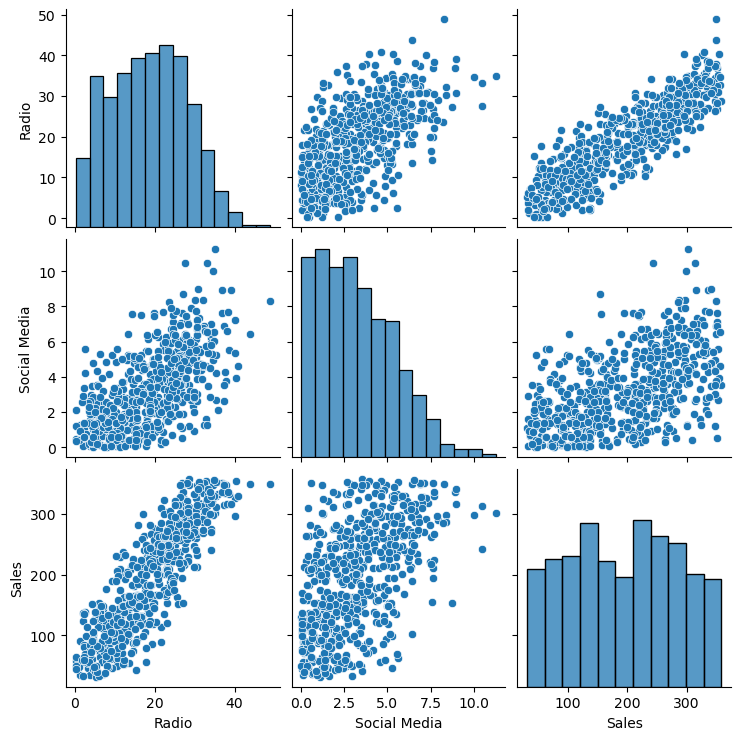

In [11]:
# Create plot of pairwise relationships


sns.pairplot(data)
# Visualizing pairwise relationships between features.

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to the video section about creating a plot that shows the 
  relationships between pairs of variables.

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function in the `seaborn` library that you can call to create a plot that shows the 
  relationships between pairs of variables.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `pairplot()` function from the `seaborn` library.

</details>

## **Question 4**: Is the assumption of linearity met?

- In the scatter plot of `Sales` over `Radio`, the points appear to cluster around a line that indicates a positive association between the two variables. Since the points cluster around a line, it seems the assumption of linearity is met.

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to the video section about checking model assumptions for linear regression.

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  Use the scatter plot of `Sales` over `Radio` found in the preceding plot of pairwise relationships. 

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  Check the scatter plot of `Sales` over `Radio` found in the preceding plot of pairwise relationships. If the data points cluster around a line, that would indicate that the assumption of linearity is met. Alternatively, if the data points resemble a random cloud or a curve, then a linear model may not fit the data well.  

</details>

# Step 3. Model Building

## Start by selecting only the columns that are needed for the model that you will build from the data.

In [12]:
# Select relevant columns
# Save resulting DataFrame in a separate variable to prepare for regression


ols_data = data[["Radio", "Sales"]]

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to the video section about selecting multiple columns from a DataFrame.

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  Use two pairs of square brackets around the names of the columns that should be selected.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  Make sure column names are spelled exactly as they are in the data.

</details>

## Display the first 10 rows of the new DataFrame to ensure it is accurate.

In [13]:
# Display first 10 rows of the new DataFrame
ols_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to the video section about displaying contents of a DataFrame.

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to display the first n number of rows of a DataFrame, where n is a number of your choice.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  Call the `head()` function from the `pandas` library and pass in the number of rows from the top that you want to display. 

</details>

## Write the linear regression formula for modeling the relationship between the two variables of interest.

In [14]:
# Write the linear regression formula
# Save it in a variable


ols_formula = "Sales ~ Radio"

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to the video section where model building for linear regression is discussed. 

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  Save the formula as string.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  Use a tilde to separate the y variable from the x variable so that the computer understands which is which. Make sure the spelling of each variable exactly matches the corresponding column from the data.

</details>

## Implement the Ordinary Least Squares (OLS) approach for linear regression.

In [15]:
# Implement OLS


OLS = ols(formula = ols_formula, data = ols_data)
# Defining and fitting an Ordinary Least Squares (OLS) regression model.

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to the video section where model building for linear regression is discussed.  

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to implement OLS.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `ols()` function from the `statsmodels` library.

</details>

## Create a linear regression model for the data and fit the model to the data.

In [16]:
# Fit the model to the data
# Save the fitted model in a variable


model = OLS.fit()

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to the video section where model building for linear regression is discussed.  

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to fit the model.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `fit()` function from the `statsmodels` library.

</details>

# Step 4. Results and Evaluation

## Get a summary of the results from the model.

In [17]:
# Get summary of results


model.summary()
# Displaying regression results including coefficients, p-values, and R-squared value.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          2.07e-176
Time:                        09:29:25   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to the video section where getting model results is discussed.  

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to get the summary of results from a model.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `summary()` function from the `statsmodels` library.

</details>

## Analyze the bottom table from the results summary.

Based on that table, identify the coefficients that the model determined would generate the line of best fit, the coefficients here being the y-intercept and the slope. 

## **Question 5**: What is the y-intercept? 

- The y-intercept is 41.5326. 

## **Question 6**: What is the slope? 

- The slope is 8.1733. 

## **Question 7**: What is the linear equation you would write to express the relationship between sales and radio promotion budget in the form of y = slope * x + y-intercept? 

- sales = 8.1733 * radio promotion budget + 41.5326

## **Question 8**: What do you think the slope in this context means?

- One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average.
- Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.

## Finish checking model assumptions.

Now that you've built the linear regression model and fit it to the data, you can finish checking the model assumptions. This will help confirm your findings.

## Plot the OLS data with the best fit regression line.

<Axes: xlabel='Radio', ylabel='Sales'>

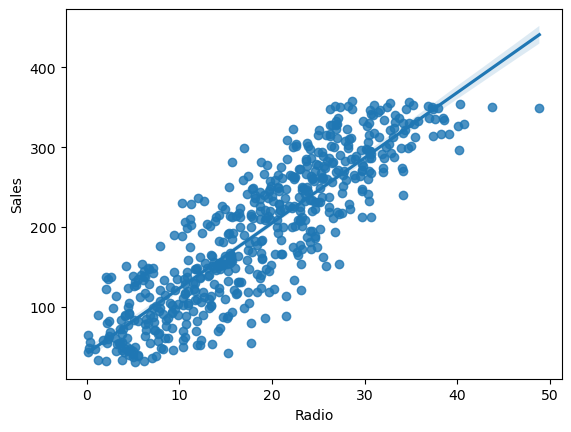

In [18]:
# Plot the OLS data with the best fit regression line


sns.regplot(x = "Radio", y = "Sales", data = ols_data)
# Plotting the best-fit regression line with the data points.

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to the video section where plotting the data with the best fit regression line is discussed.  

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be useful here.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `regplot()` function from the `seaborn` library.

</details>

## **Question 9**: What do you observe from the preceding regression plot?

- The preceding regression plot illustrates an approximately linear relationship between the two variables along with the best fit line. This confirms the assumption of linearity.

## Check the normality assumption.

To get started, get the residuals from the model.

In [19]:
# Get the residuals from the model


residuals = model.resid

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to the video section where accessing residuals is discussed.  

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is an attribute from the `statsmodels` library that can be called to get the residuals from a fitted model.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `resid` attribute from the `statsmodels` library.

</details>

Visualize the distribution of the residuals.

C:\Users\NiamatullahHa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


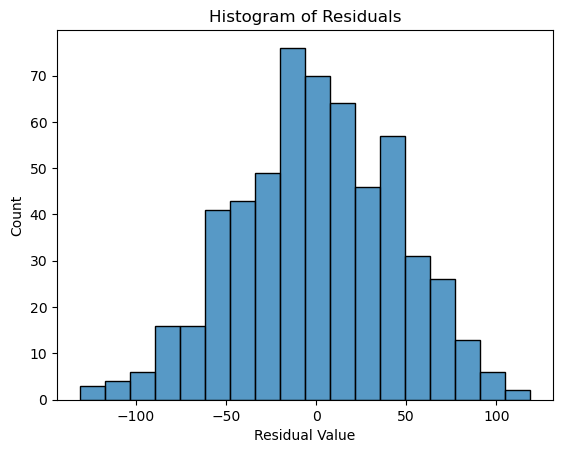

In [20]:
# Visualize the distribution of the residuals


fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()
# Checking if residuals follow a normal distribution using a histogram.

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to the video section where visualizing residuals is discussed.  

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be called to create a histogram.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `histplot()` function from the `seaborn` library.

</details>

## **Question 10**: Based on the preceding visualization, what do you observe about the distribution of the residuals?

- Based on the preceding visualization, the distribution of the residuals is approximately normal. This indicates that the assumption of normality is likely met.


## Create a Q-Q plot to confirm the assumption of normality.

In [ ]:
# Create a Q-Q plot 


sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()
# Creating a Q-Q plot to confirm residual normality.

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to the video section where creating a Q-Q plot is discussed.  

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to create a Q-Q plot.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `qqplot()` function from the `statsmodels` library.

</details>

## **Question 11**: Is the assumption of normality met?

- In the preceding Q-Q plot, the points closely follow a straight diagonal line trending upward. This confirms that the normality assumption is met.

## Check the assumptions of independent observation and homoscedasticity.

Start by getting the fitted values from the model.

In [ ]:
# Get fitted values


fitted_values = model.predict(ols_data["Radio"])

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to the video section where calculating fitted values is discussed.  

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to calculate fitted values from the model.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `predict()` function from the `statsmodels` library. Make sure to pass in the column from `ols_data` corresponding to the x variable.

</details>

Create a scatterplot of the residuals against the fitted values.

In [ ]:
# Create a scatterplot of residuals against fitted values


fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()
# Checking for homoscedasticity by plotting residuals vs. fitted values.

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to the video section where visualizing residuals against fitted values is discussed.

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be called to create a scatterplot.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `scatterplot()` function from the `seaborn` library.

</details>

## **Question 12**: Are the assumptions of independent observation and homoscedasticity met?

- In the preceding scatterplot, the data points have a cloud-like resemblance and do not follow an explicit pattern. So it appears that the independent observation assumption has not been violated. Given that the residuals appear to be randomly spaced, the homoscedasticity assumption seems to be met.

# Conclusion

**What are the key takeaways from this lab?**
- Data visualizations and exploratory data analysis can be used to check if linear regression is a well suited approach for modeling the relationship between two variables.
- The results of a linear regression model can be used to express the relationship between two variables. 

**What results can be presented from this lab?**

In the simple linear regression model, the y-intercept is 41.5326 and the slope is 8.1733. 
    One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average.
    Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.


The results are statistically significant with a p-value of 0.000, which is a very small value (and smaller than the common significance level of 0.05). This indicates that there is a very low probability of observing data as extreme or more extreme than this dataset when the null hypothesis is true. In this context, the null hypothesis is that there is no relationship between radio promotion budget and sales i.e. the slope is zero, and the alternative hypothesis is that there is a relationship between radio promotion budget and sales i.e. the slope is not zero. So, you could reject the null hypothesis and state that there is a relationship between radio promotion budget and sales for companies in this data.

The slope of the line of best fit that resulted from the regression model is approximate and subject to uncertainty (not the exact value). The 95% confidence interval for the slope is from 7.791 to 8.555. This indicates that there is a 95% probability that the interval [7.791, 8.555] contains the true value for the slope. 

**How would you frame your findings to external stakeholders?**

Based on the dataset at hand and the regression analysis conducted here, there is a notable relationship between radio promotion budget and sales for companies in this data, with a p-value of 0.000 and standard error of 0.194. For companies represented by this data, a 1 million dollar increase in radio promotion budget could be associated with a 8.1733 million dollar increase in sales. It would be worth continuing to promote products/services on the radio. Also, it is recommended to consider further examining the relationship between the two variables (radio promotion budget and sales) in different contexts. For example, it would help to gather more data to understand whether this relationship is different in certain industries or when promoting certain types of products/services. 

**References**

Pandas.DataFrame.Any — Pandas 1.4.3 Documentation. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html.

Pandas.DataFrame.Isna — Pandas 1.4.3 Documentation. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html.

Pandas.Series.Sum — Pandas 1.4.3 Documentation. https://pandas.pydata.org/docs/reference/api/pandas.Series.sum.html.

Saragih, H.S. *Dummy Marketing and Sales Data*. https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.